In [ ]:
import tensorflow as tf

data_dir = "/kaggle/input/traffic-signs-classification/traffic_Data/DATA"


In [ ]:
import os

dataset_path = '/kaggle/input/traffic-signs-classification/traffic_Data/DATA'
dataset_size = sum(os.path.getsize(os.path.join(dataset_path, f)) for f in os.listdir(dataset_path))

print(f"Dataset size: {dataset_size} bytes")


Dataset size: 237568 bytes


In [ ]:
train_dir="/kaggle/input/traffic-signs-classification/traffic_Data/train"

In [ ]:
test_dir="/kaggle/input/traffic-signs-classification/traffic_Data/test"

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)#initialize train generator 
                                 
test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(128,128),batch_size=32,class_mode='categorical')

#validation_generator = valid_datagen.flow_from_directory(validation_ds, target_size=(128,128),batch_size=32,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(128,128),batch_size=32,class_mode='categorical')

Found 3332 images belonging to 58 classes.

Found 824 images belonging to 58 classes.


In [ ]:
import os

train_dir = '/kaggle/input/traffic-signs-classification/traffic_Data/train'

# Count the number of images in each subdirectory
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        num_images = len(os.listdir(class_dir))
        print("Class {}: {} images".format(class_name, num_images))


Class 0: 97 images

Class 1: 32 images

Class 10: 58 images

Class 11: 113 images

Class 12: 68 images

Class 13: 29 images

Class 14: 103 images

Class 15: 19 images

Class 16: 108 images

Class 17: 116 images

Class 18: 6 images

Class 19: 3 images

Class 2: 60 images

Class 20: 17 images

Class 21: 10 images

Class 22: 16 images

Class 23: 12 images

Class 24: 78 images

Class 25: 2 images

Class 26: 93 images

Class 27: 20 images

Class 28: 353 images

Class 29: 30 images

Class 3: 214 images

Class 30: 117 images

Class 31: 36 images

Class 32: 12 images

Class 33: 2 images

Class 34: 19 images

Class 35: 128 images

Class 36: 33 images

Class 37: 47 images

Class 38: 24 images

Class 39: 23 images

Class 4: 82 images

Class 40: 25 images

Class 41: 15 images

Class 42: 27 images

Class 43: 66 images

Class 44: 25 images

Class 45: 19 images

Class 46: 13 images

Class 47: 7 images

Class 48: 8 images

Class 49: 35 images

Class 5: 151 images

Class 50: 38 images

Class 51: 8 imag

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize

# Define the path to your train folder containing the images
train_dir = '/kaggle/input/traffic-signs-classification/traffic_Data/train'

# Define the number of images you want to generate for each class
num_samples = 100

# Define the parameters for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Get a list of the classes in the train folder
classes = sorted(os.listdir(train_dir))

# Generate balanced samples for each class
for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    num_existing_samples = len(os.listdir(class_dir))
    if num_existing_samples < num_samples:
        num_to_generate = num_samples - num_existing_samples
        print(f"Generating {num_to_generate} samples for class {class_name}")
        image_files = [os.path.join(class_dir, f) for f in os.listdir(class_dir)]
        image_array = np.array([resize(plt.imread(f), (128, 128)) for f in image_files])
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        flow = datagen.flow(image_array, batch_size=32, save_to_dir=class_dir, save_prefix=class_name, save_format='png')
        for i in range(num_to_generate // 32):
            flow.next()
        remaining = num_to_generate % 32
        if remaining > 0:
            flow = datagen.flow(image_array, batch_size=remaining, save_to_dir=class_dir, save_prefix=class_name, save_format='png')
            flow.next()
    else:
        print(f"Class {class_name} is already balanced")


Generating 5 samples for class 0

Generating 66 samples for class 1

Generating 47 samples for class 10

Class 11 is already balanced

Generating 19 samples for class 12

Generating 72 samples for class 13

Generating 1 samples for class 14

Generating 82 samples for class 15

Class 16 is already balanced

Generating 2 samples for class 17

Generating 92 samples for class 18

Generating 96 samples for class 19

Generating 36 samples for class 2

Generating 86 samples for class 20

Generating 90 samples for class 21

Generating 87 samples for class 22

Generating 87 samples for class 23

Generating 24 samples for class 24

Generating 98 samples for class 25

Generating 9 samples for class 26

Generating 85 samples for class 27

Class 28 is already balanced

Generating 61 samples for class 29

Class 3 is already balanced

Class 30 is already balanced

Generating 63 samples for class 31

Generating 90 samples for class 32

Generating 96 samples for class 33

Generating 77 samples for clas

In [ ]:
img=train_generator[0]
img

(array([[[[0.4156863 , 0.41960788, 0.427451  ],
          [0.4156863 , 0.41960788, 0.427451  ],
          [0.4039216 , 0.41960788, 0.42352945],
          ...,
          [0.13725491, 0.15686275, 0.28235295],
          [0.13725491, 0.16078432, 0.28627452],
          [0.13725491, 0.16078432, 0.28627452]],
 
         [[0.4156863 , 0.41960788, 0.427451  ],
          [0.4156863 , 0.41960788, 0.427451  ],
          [0.4039216 , 0.41960788, 0.42352945],
          ...,
          [0.13725491, 0.15686275, 0.28235295],
          [0.13725491, 0.16078432, 0.28627452],
          [0.13725491, 0.16078432, 0.28627452]],
 
         [[0.40784317, 0.41176474, 0.41960788],
          [0.40784317, 0.41176474, 0.41960788],
          [0.39607847, 0.41176474, 0.4156863 ],
          ...,
          [0.15294118, 0.17254902, 0.29803923],
          [0.15686275, 0.1764706 , 0.3019608 ],
          [0.15686275, 0.1764706 , 0.3019608 ]],
 
         ...,
 
         [[0.39607847, 0.38431376, 0.40784317],
          [0.39607

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

def vgg16(input_shape=(128, 128, 3), num_classes=58):
    model = tf.keras.Sequential()

    # Block 1
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 2
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 3
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 4
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 5
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    # Classification
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=4096, activation='relu'))
    model.add(tf.keras.layers.Dense(units=4096, activation='relu'))
    model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))
    

    return model

In [ ]:
# create the model
model = vgg16()

# print the model summary
model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 128, 128, 64)      1792      

                                                                 

 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     

                                                                 

 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         

 )                                                               

                                                                 

 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     

                                                                 

 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    

                                                                 

 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         

 2D)                                    

In [ ]:
type(data_dir)

str

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])  

In [ ]:
har = model.fit(train_generator, validation_data=test_generator, epochs=5,batch_size=32)

Epoch 1/5

105/105 [==============================] - 2920s 28s/step - loss: 3.6413 - accuracy: 0.0963 - val_loss: 3.6316 - val_accuracy: 0.0959

Epoch 2/5

105/105 [==============================] - 2898s 28s/step - loss: 3.5610 - accuracy: 0.1023 - val_loss: 3.6093 - val_accuracy: 0.0959

Epoch 3/5

105/105 [==============================] - 2830s 27s/step - loss: 3.5555 - accuracy: 0.1059 - val_loss: 3.5941 - val_accuracy: 0.0959

Epoch 4/5

105/105 [==============================] - 2800s 27s/step - loss: 3.5554 - accuracy: 0.1023 - val_loss: 3.5980 - val_accuracy: 0.0959

Epoch 5/5

105/105 [==============================] - 2798s 27s/step - loss: 3.5462 - accuracy: 0.1014 - val_loss: 3.6097 - val_accuracy: 0.0959


In [ ]:
import numpy as np 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
file_list = os.listdir(test_dir)
num_files = len(file_list)
batch_size = 32
num_batches = int(num_files / batch_size)

In [ ]:
import pandas as pd

In [ ]:
n_categories = len(os.listdir('/kaggle/input/traffic-signs-classification/traffic_Data/train'))# number of categories
print(n_categories)

20


In [ ]:
df = pd.DataFrame(har.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
0,3.641265,0.096339,3.631629,0.095874
1,3.561029,0.102341,3.609257,0.095874
2,3.555529,0.105942,3.594140,0.095874
3,3.555406,0.102341,3.598009,0.095874
4,3.546203,0.101441,3.609705,0.095874


In [ ]:
df = pd.DataFrame(har.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,3.641265,0.096339,3.631629,0.095874
1,3.561029,0.102341,3.609257,0.095874
2,3.555529,0.105942,3.594140,0.095874
3,3.555406,0.102341,3.598009,0.095874
4,3.546203,0.101441,3.609705,0.095874


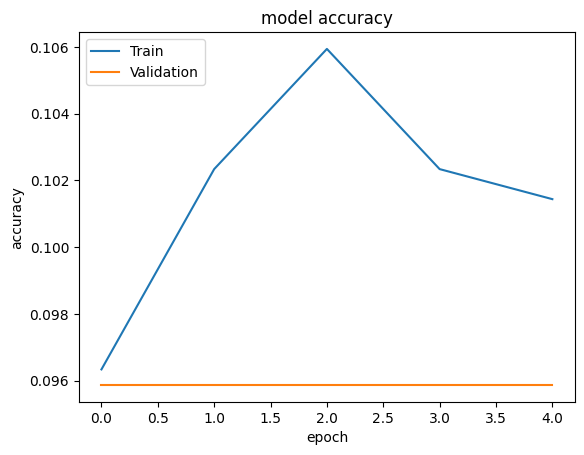

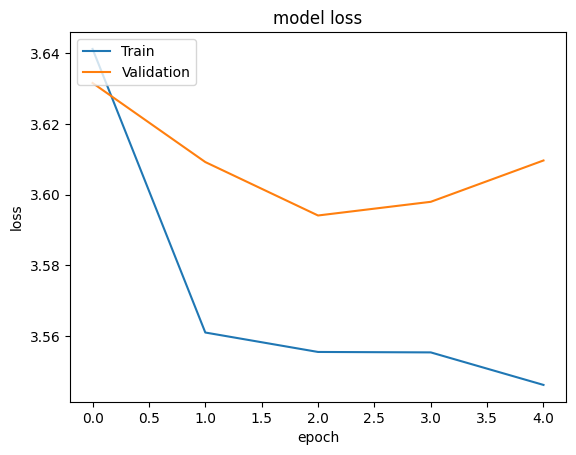

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(har.history['accuracy'])
plt.plot(har.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(har.history['loss'])
plt.plot(har.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

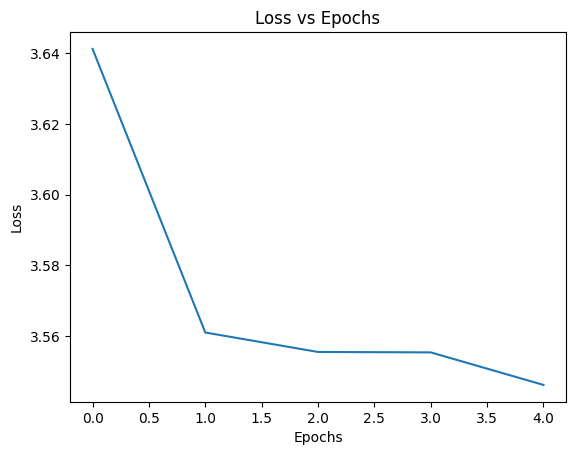

In [ ]:
loss_plot = df.plot(y='loss', title='Loss vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

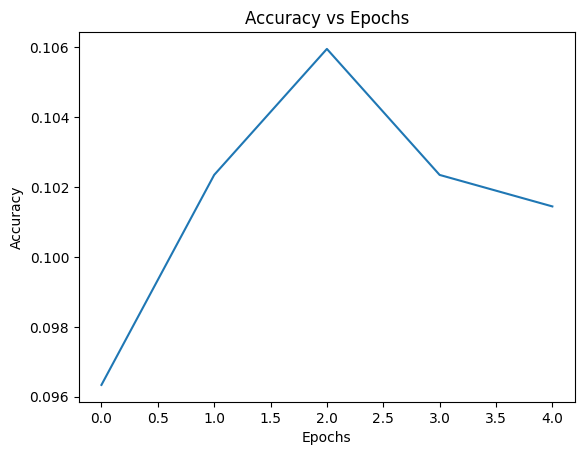

In [ ]:
acc_plot = df.plot(y='accuracy', title='Accuracy vs Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

In [ ]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

In [ ]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {test_ds[predicted_class]}')
    print('Class probability:', class_probability)